In [22]:
%matplotlib inline 

import pandas
import pickle
import matplotlib.pyplot as plt 
from sklearn import preprocessing

plt.style.use( 'bmh' ) 

In [23]:
# small feature sets, < 100 features per mutant 
feature_sets = [ 
# for thermal paper 
    'feature_sets/foldx_runs_pssm.csv', 
    'feature_sets/rosetta_runs_benchmark.csv', 
    'feature_sets/rosetta_runs_ddg_monomer.csv', 
# for new-style constraints 
    'feature_sets/constraint_exploration_run.csv', 
    'feature_sets/bigger_constraint_exploration_run.csv', 
    'feature_sets/benchmark_run.csv', 
# for low- and high-resolution ddg protocols 
    'feature_sets/rosetta_runs__ddg_monomer_low_res.csv', 
    'feature_sets/rosetta_runs__ddg_monomer_high_res.csv'
]

In [24]:
# the four targets we will be using as training data  
target_names = [ 'kcat', 'km', 'kcatkm', 'tm' ] 

In [25]:
# load in experimental data 
target_df = pandas.read_csv( '/Users/alex/Documents/bagel-thermal/data_set/targets.csv', index_col=0 )

In [26]:
# load in additional features
add = pandas.read_csv( 'feature_sets/add.csv', index_col=0 ) 

In [27]:
# scale features and have in data structure (dict)
features = {}
for feature_set in feature_sets:
    df = pandas.read_csv( feature_set, index_col=0 ) 
    for target in target_names: 
        scl = preprocessing.RobustScaler()
        J = target_df[ [ 'target_{}'.format( target ) ] ].join( df ).dropna() # .join( add ).dropna()
        J = J.select_dtypes([ 'float64' ])
        y = J.ix[:, 0].ravel() # first column is the target
        X = scl.fit_transform( J.ix[:, 1:] )
        features.update({ ( target, feature_set ): ( X, y, J ) })

In [28]:
targets, feature_sets = zip( *features.keys() )
targets = set( targets ) 
feature_sets = set( feature_sets ) 

In [29]:
# generate tables of feature correlations for Tm paper 

for i, f_set in enumerate( feature_sets ):
    print( 'Feature set:', f_set ) 
    for j, t in enumerate( targets ):
    
        # get data 
        X, y, J = features[ ( t, f_set ) ] 
        
        # assess correlation 
        corr = J.corr()[['target_{}'.format( t )] ].drop( 'target_{}'.format( t ) )
        col_name = 'Pearson correlation to {}'.format( t )
        corr.columns = [ col_name ]
        corr.sort_values( by=col_name, inplace=True ) 
        corr.to_csv( '{}'.format( f_set ).replace('sets', 'correlations').replace('/','/{}__'.format(t)) )
        #print( corr, end='\n\n' ) 

Feature set: feature_sets/foldx_runs_pssm.csv
Feature set: feature_sets/rosetta_runs_benchmark.csv
Feature set: feature_sets/benchmark_run.csv
Feature set: feature_sets/constraint_exploration_run.csv
Feature set: feature_sets/rosetta_runs__ddg_monomer_low_res.csv
Feature set: feature_sets/rosetta_runs__ddg_monomer_high_res.csv
Feature set: feature_sets/rosetta_runs_ddg_monomer.csv
Feature set: feature_sets/bigger_constraint_exploration_run.csv


In [30]:
!ls -l feature_correlations/

total 264
-rw-r--r--  1 alex  staff  1855 Feb 14 12:19 kcat__benchmark_run.csv
-rw-r--r--  1 alex  staff   896 Feb 14 12:19 kcat__bigger_constraint_exploration_run.csv
-rw-r--r--  1 alex  staff   893 Feb 14 12:19 kcat__constraint_exploration_run.csv
-rw-r--r--  1 alex  staff   587 Feb 14 12:19 kcat__foldx_runs_pssm.csv
-rw-r--r--  1 alex  staff   556 Feb 14 12:19 kcat__rosetta_runs__ddg_monomer_high_res.csv
-rw-r--r--  1 alex  staff   569 Feb 14 12:19 kcat__rosetta_runs__ddg_monomer_low_res.csv
-rw-r--r--  1 alex  staff  1886 Feb 14 12:19 kcat__rosetta_runs_benchmark.csv
-rw-r--r--  1 alex  staff   415 Feb 14 12:19 kcat__rosetta_runs_ddg_monomer.csv
-rw-r--r--  1 alex  staff  1853 Feb 14 12:19 kcatkm__benchmark_run.csv
-rw-r--r--  1 alex  staff   893 Feb 14 12:19 kcatkm__bigger_constraint_exploration_run.csv
-rw-r--r--  1 alex  staff   889 Feb 14 12:19 kcatkm__constraint_exploration_run.csv
-rw-r--r--  1 alex  staff   584 Feb 14 12:19 kcatkm__foldx_runs_pssm.csv
-rw-r--r--  1 alex  sta

In [31]:
# generates bar plots of PCC per-feature (kinda worthless) 

# for i, f_set in enumerate( feature_sets ):
#     print( 'Feature set:', f_set ) 
#     fig, ax = plt.subplots( nrows=1, ncols=len(targets), figsize=(10,10) ) 
#     fig.suptitle( f_set, fontsize='large' ) 
#     for j, t in enumerate( targets ):
    
#         # get data 
#         X, y, J = features[ ( t, f_set ) ] 
#         fig.set_figheight( 0.2*len(J.columns) ) 
        
#         # assess correlation 
#         corr = J.corr()[ 'target_{}'.format( t ) ].drop( 'target_{}'.format( t ) ).sort_values() 
        
#         # plot results 
#         ax[j].barh( range( len( corr ) ), corr, color='k', align='center' ) 
#         ax[j].set_xticks( [ -1, -.5, 0, .5, 1 ] )
#         ax[j].set_xticklabels( [ -1, '', 0, '', 1 ] )
#         ax[j].set_xlim( [ -1, 1 ] ) 
#         ax[j].set_xlabel( t ) 
    
#         # label features
#         ax[j].set_yticks( range( len( corr ) ) )
#         ax[j].set_yticklabels( corr.index ) 
#         ax[j].set_ylim( -0.5, len( corr )-0.5 )  
        
#     fig.tight_layout()

In [32]:
# write out the scaled features so we can use in ML notebooks 
with open( 'feature_sets/scaled.pkl', 'wb' ) as fn:
    pickle.dump( features, fn )

### Predicted energies of mutations compared to experimental values 

The predicted total system energies throughout our data set happen to be unique. They are

In [38]:
make_plots = [ 'total', 'total_score', 'total energy' ] 

We can plot the predicted energy against the Tm that we have determined to evaluate the performance of the algorithms underlying the Rosetta simulations. 

Feature set: feature_sets/foldx_runs_pssm.csv
Electrostatics          -0.248610
Solvation Polar         -0.218667
total energy            -0.179179
energy Ionisation       -0.143117
torsional clash         -0.133841
Van der Waals clashes   -0.121095
Solvation Hydrophobic   -0.048905
disulfide                0.026874
entropy sidechain        0.045208
backbone clash           0.075336
Van der Waals            0.076851
Sidechain Hbond          0.091553
helix dipole             0.113391
entropy mainchain        0.191402
Backbone Hbond           0.295736
Name: target_tm, dtype: float64


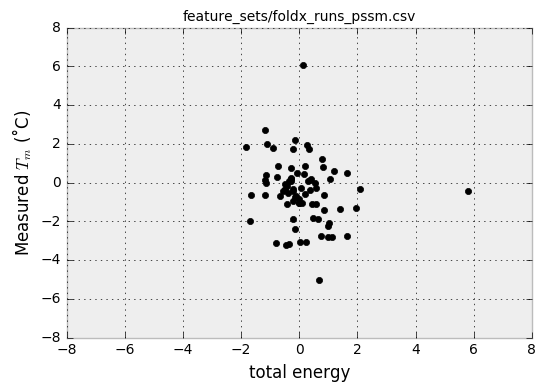

Feature set: feature_sets/rosetta_runs_benchmark.csv
SR_2_total_score        -0.382355
SR_2_burunsat_pm        -0.268314
SR_2_fa_rep             -0.261130
tot_burunsat_pm         -0.230710
hbond_sc                -0.207570
SR_3_hbond_pm           -0.181342
SR_1_hbond_pm           -0.181342
SR_4_burunsat_pm        -0.140314
SR_2_hbond_pm           -0.131520
SR_3_all_cst            -0.125746
SR_1_all_cst            -0.125746
SR_5_dsasa_1_2          -0.124174
SR_3_fa_rep             -0.115693
SR_1_fa_rep             -0.115693
tot_total_charge        -0.112372
SR_4_hbond_pm           -0.082621
tot_pstat_pm            -0.081656
SR_5_fa_rep             -0.079353
SR_4_fa_rep             -0.048775
tot_total_pos_charges   -0.043036
tot_NLconts_pm          -0.039178
SR_5_hbond_sc           -0.036701
SR_5_interf_E_1_2       -0.003184
SR_5_total_score        -0.002951
SR_4_hbond_sc            0.013907
total_score              0.022516
tot_nlpstat_pm           0.022517
fa_rep                   0.02

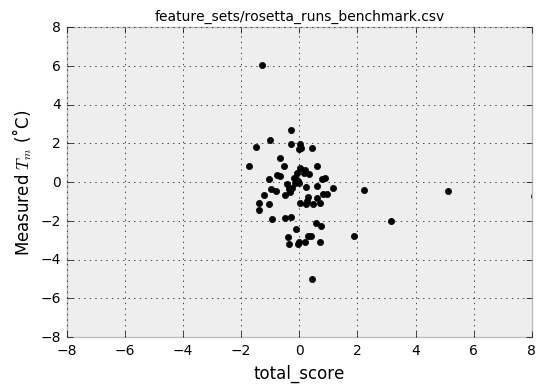

Feature set: feature_sets/benchmark_run.csv
hbond_sc            -0.159248
SR_4_burunsat_pm    -0.125534
SR_2_all_cst        -0.081126
SR_1_hbond_pm       -0.064773
SR_3_hbond_pm       -0.064773
SR_2_hbond_sc       -0.037656
SR_4_pstat_pm       -0.034677
SR_4_hbond_pm       -0.025272
SR_2_burunsat_pm    -0.024926
SR_1_nlpstat_pm     -0.008802
SR_3_nlpstat_pm     -0.008802
SR_3_pstat_pm       -0.000825
SR_1_pstat_pm       -0.000825
SR_1_fa_rep         -0.000812
SR_3_fa_rep         -0.000812
total_score         -0.000638
tot_pstat_pm         0.004259
SR_4_fa_rep          0.009474
SR_2_fa_rep          0.010717
SR_1_total_score     0.014396
SR_3_total_score     0.014396
SR_2_nlpstat_pm      0.014428
tot_nlpstat_pm       0.024393
SR_2_hbond_pm        0.024926
SR_5_fa_rep          0.028293
tot_hbond_pm         0.040308
SR_5_all_cst         0.040504
SR_4_total_score     0.042030
SR_5_hbond_pm        0.048153
SR_5_hbond_sc        0.049373
SR_4_hbond_sc        0.058376
SR_2_total_score     0.060

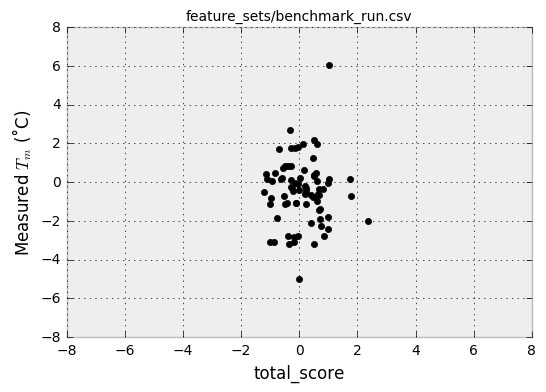

Feature set: feature_sets/constraint_exploration_run.csv
fa_sol                 -0.315420
lk_ball                -0.227639
pro_close              -0.168618
fa_intra_rep_xover4    -0.168022
fa_rep                 -0.149142
hbond_sr_bb            -0.124593
total_score            -0.123327
fa_intra_sol_xover4    -0.119304
fa_dun_dev             -0.110143
fa_dun_semi            -0.085669
dslf_fa13              -0.079195
hbond_sc               -0.074114
p_aa_pp                -0.024710
fa_intra_atr_xover4    -0.016162
hbond_lr_bb            -0.008302
fa_dun_rot              0.068070
rama_prepro             0.100606
ref                     0.117161
lk_ball_bridge_uncpl    0.130176
fa_intra_elec           0.163835
lk_ball_bridge          0.178872
hbond_bb_sc             0.189012
fa_atr                  0.189860
hxl_tors                0.195995
fa_elec                 0.203654
omega                   0.254099
lk_ball_iso             0.284765
Name: target_tm, dtype: float64


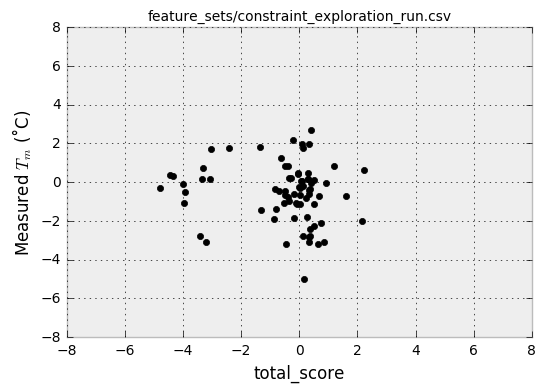

Feature set: feature_sets/rosetta_runs__ddg_monomer_low_res.csv
fa_intra_rep    -2.245527e-01
fa_dun          -1.678676e-01
score           -7.258425e-02
fa_rep          -5.762596e-02
fa_elec         -2.875105e-02
hbond_bb_sc     -7.950577e-03
fa_atr          -5.316558e-03
hbond_sc        -2.876496e-03
hbond_lr_bb     -7.730304e-17
ref             -7.730304e-17
rama            -6.559045e-17
hbond_sr_bb      7.730304e-17
omega            7.730304e-17
p_aa_pp          7.730304e-17
dslf_fa13        5.127940e-02
fa_sol           6.050164e-02
pro_close        9.781197e-02
yhh_planarity    1.930803e-01
Name: target_tm, dtype: float64
Feature set: feature_sets/rosetta_runs__ddg_monomer_high_res.csv
fa_dun          -0.251752
hbond_lr_bb     -0.192523
fa_elec         -0.189653
total           -0.164679
hbond_sc        -0.147335
fa_sol          -0.126170
hbond_sr_bb     -0.112117
yhh_planarity   -0.055863
pro_close       -0.052197
dslf_fa13       -0.014267
fa_intra_rep    -0.009356
fa_rep       

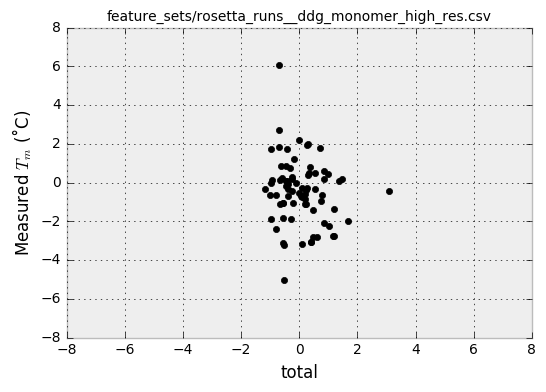

Feature set: feature_sets/rosetta_runs_ddg_monomer.csv
fa_sol          -0.292737
fa_dun          -0.134925
yhh_planarity   -0.056853
pro_close       -0.051345
fa_rep          -0.027667
fa_intra_rep    -0.026757
total            0.017224
fa_elec          0.068927
hbond_sc         0.114652
rama             0.164787
p_aa_pp          0.192808
fa_atr           0.223547
hbond_bb_sc      0.286535
Name: target_tm, dtype: float64


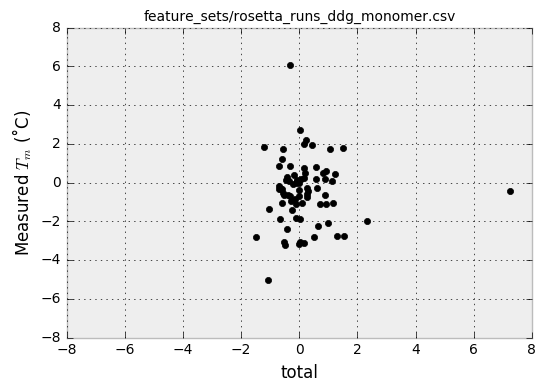

Feature set: feature_sets/bigger_constraint_exploration_run.csv
fa_sol                 -0.349138
lk_ball                -0.255897
fa_intra_sol_xover4    -0.149005
hbond_sr_bb            -0.124593
dslf_fa13              -0.075124
fa_dun_dev             -0.054400
fa_rep                 -0.025473
p_aa_pp                -0.024710
hbond_lr_bb            -0.008302
fa_dun_semi             0.021983
fa_intra_rep_xover4     0.048354
pro_close               0.049805
total_score             0.051184
fa_intra_atr_xover4     0.054909
fa_dun_rot              0.056837
fa_intra_elec           0.060184
lk_ball_bridge_uncpl    0.072218
rama_prepro             0.100606
hbond_sc                0.108834
hxl_tors                0.113241
ref                     0.117161
fa_atr                  0.166235
hbond_bb_sc             0.170850
fa_elec                 0.184603
lk_ball_bridge          0.198519
omega                   0.254099
lk_ball_iso             0.314298
Name: target_tm, dtype: float64


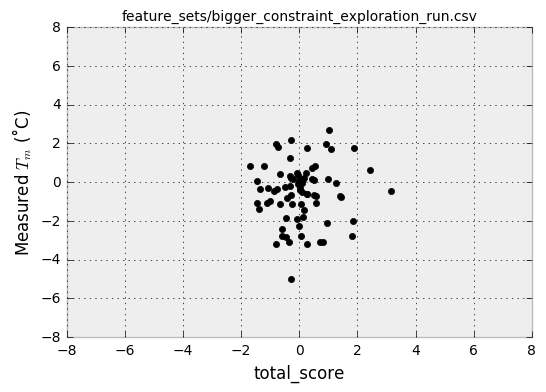

In [51]:
for i, f_set in enumerate( feature_sets ):
    print( 'Feature set:', f_set )
    X, y, J = features[ ( 'tm', f_set ) ]
    X = pandas.DataFrame( X, columns=J.columns[1:] ) 
    corr = J.corr(method='pearson')['target_tm'].drop('target_tm').dropna().sort_values()
    print( corr )
    for feat in J.columns:
        if feat in make_plots:
            
            # show only middle 90% of data 
            plt.xlim((-8,8))
            plt.ylim((-8,8))
            plt.scatter( X[ feat ], J[ 'target_tm' ], color='k' )
            plt.title( f_set, fontsize='medium' ) 
            plt.xlabel( feat ) 
            plt.ylabel( 'Measured $T_m$ (˚C)' ) 
            plt.show()

Let's try putting them all on the same plot with different colors, to get an idea of how these algorithms perform in general as well as specific cases

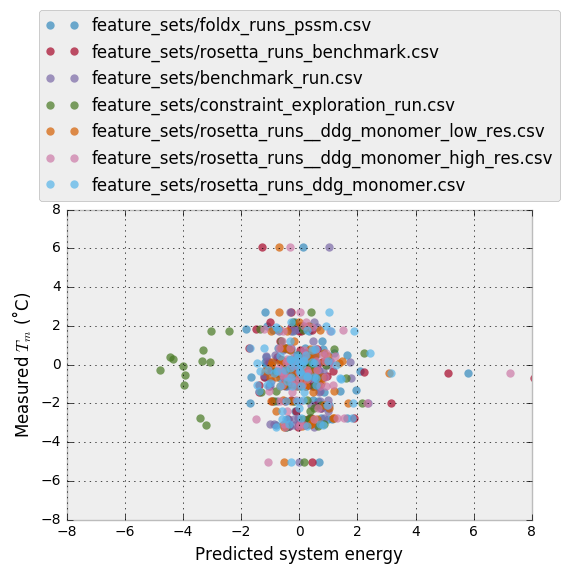

In [96]:
fig, ax = plt.subplots( nrows=1, ncols=1 ) 
for i, f_set in enumerate( feature_sets ):
    X, y, J = features[ ( 'tm', f_set ) ]
    X = pandas.DataFrame( X, columns=J.columns[1:] ) 
    corr = J.corr(method='pearson')['target_tm'].drop('target_tm').dropna().sort_values()
    for feat in J.columns:
        if feat in make_plots:
            ax.set_xlim((-8,8))
            ax.set_ylim((-8,8))
            ax.plot( X[ feat ], J[ 'target_tm' ], 'o', markeredgewidth=0, alpha=0.7 )
            ax.set_xlabel( 'Predicted system energy' ) 
ax.set_ylabel( 'Measured $T_m$ (˚C)' ) 
ax.legend(feature_sets, loc='lower center', bbox_to_anchor=(0.5, 1))

Quantile approach 

Feature set: feature_sets/foldx_runs_pssm.csv
Electrostatics          -0.248610
Solvation Polar         -0.218667
total energy            -0.179179
energy Ionisation       -0.143117
torsional clash         -0.133841
Van der Waals clashes   -0.121095
Solvation Hydrophobic   -0.048905
disulfide                0.026874
entropy sidechain        0.045208
backbone clash           0.075336
Van der Waals            0.076851
Sidechain Hbond          0.091553
helix dipole             0.113391
entropy mainchain        0.191402
Backbone Hbond           0.295736
Name: target_tm, dtype: float64


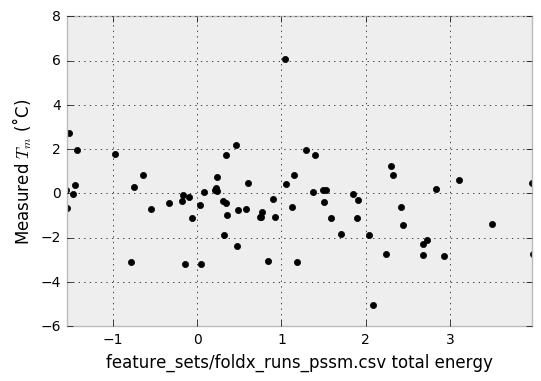


Feature set: feature_sets/rosetta_runs_benchmark.csv
SR_2_total_score        -0.382355
SR_2_burunsat_pm        -0.268314
SR_2_fa_rep             -0.261130
tot_burunsat_pm         -0.230710
hbond_sc                -0.207570
SR_3_hbond_pm           -0.181342
SR_1_hbond_pm           -0.181342
SR_4_burunsat_pm        -0.140314
SR_2_hbond_pm           -0.131520
SR_3_all_cst            -0.125746
SR_1_all_cst            -0.125746
SR_5_dsasa_1_2          -0.124174
SR_3_fa_rep             -0.115693
SR_1_fa_rep             -0.115693
tot_total_charge        -0.112372
SR_4_hbond_pm           -0.082621
tot_pstat_pm            -0.081656
SR_5_fa_rep             -0.079353
SR_4_fa_rep             -0.048775
tot_total_pos_charges   -0.043036
tot_NLconts_pm          -0.039178
SR_5_hbond_sc           -0.036701
SR_5_interf_E_1_2       -0.003184
SR_5_total_score        -0.002951
SR_4_hbond_sc            0.013907
total_score              0.022516
tot_nlpstat_pm           0.022517
fa_rep                   0.0

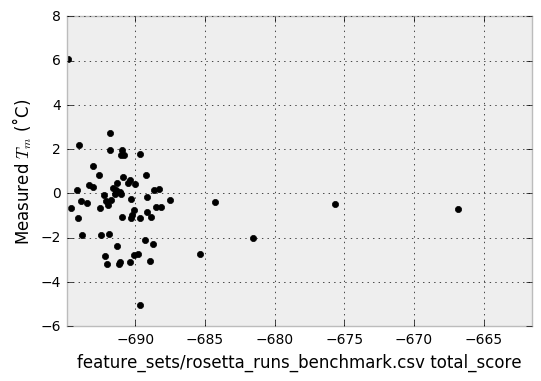


Feature set: feature_sets/benchmark_run.csv
hbond_sc            -0.159248
SR_4_burunsat_pm    -0.125534
SR_2_all_cst        -0.081126
SR_1_hbond_pm       -0.064773
SR_3_hbond_pm       -0.064773
SR_2_hbond_sc       -0.037656
SR_4_pstat_pm       -0.034677
SR_4_hbond_pm       -0.025272
SR_2_burunsat_pm    -0.024926
SR_1_nlpstat_pm     -0.008802
SR_3_nlpstat_pm     -0.008802
SR_3_pstat_pm       -0.000825
SR_1_pstat_pm       -0.000825
SR_1_fa_rep         -0.000812
SR_3_fa_rep         -0.000812
total_score         -0.000638
tot_pstat_pm         0.004259
SR_4_fa_rep          0.009474
SR_2_fa_rep          0.010717
SR_1_total_score     0.014396
SR_3_total_score     0.014396
SR_2_nlpstat_pm      0.014428
tot_nlpstat_pm       0.024393
SR_2_hbond_pm        0.024926
SR_5_fa_rep          0.028293
tot_hbond_pm         0.040308
SR_5_all_cst         0.040504
SR_4_total_score     0.042030
SR_5_hbond_pm        0.048153
SR_5_hbond_sc        0.049373
SR_4_hbond_sc        0.058376
SR_2_total_score     0.06

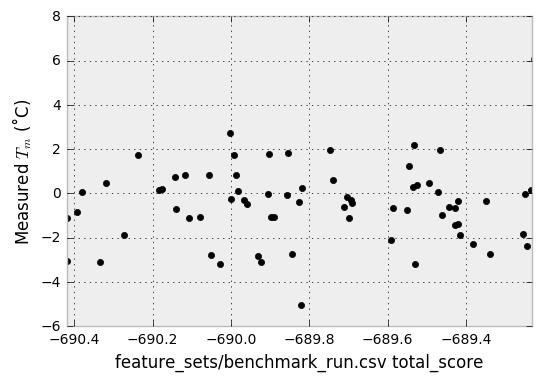


Feature set: feature_sets/constraint_exploration_run.csv
fa_sol                 -0.315420
lk_ball                -0.227639
pro_close              -0.168618
fa_intra_rep_xover4    -0.168022
fa_rep                 -0.149142
hbond_sr_bb            -0.124593
total_score            -0.123327
fa_intra_sol_xover4    -0.119304
fa_dun_dev             -0.110143
fa_dun_semi            -0.085669
dslf_fa13              -0.079195
hbond_sc               -0.074114
p_aa_pp                -0.024710
fa_intra_atr_xover4    -0.016162
hbond_lr_bb            -0.008302
fa_dun_rot              0.068070
rama_prepro             0.100606
ref                     0.117161
lk_ball_bridge_uncpl    0.130176
fa_intra_elec           0.163835
lk_ball_bridge          0.178872
hbond_bb_sc             0.189012
fa_atr                  0.189860
hxl_tors                0.195995
fa_elec                 0.203654
omega                   0.254099
lk_ball_iso             0.284765
Name: target_tm, dtype: float64


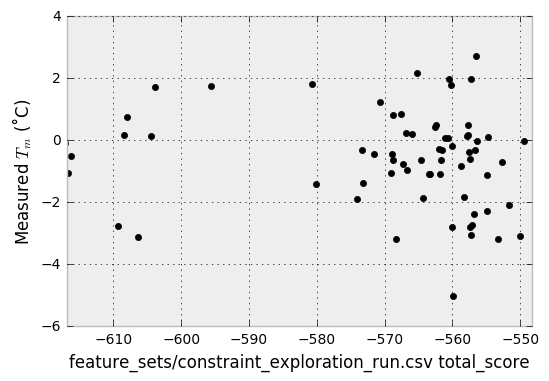


Feature set: feature_sets/rosetta_runs__ddg_monomer_low_res.csv
fa_intra_rep    -2.245527e-01
fa_dun          -1.678676e-01
score           -7.258425e-02
fa_rep          -5.762596e-02
fa_elec         -2.875105e-02
hbond_bb_sc     -7.950577e-03
fa_atr          -5.316558e-03
hbond_sc        -2.876496e-03
hbond_lr_bb     -7.730304e-17
ref             -7.730304e-17
rama            -6.559045e-17
hbond_sr_bb      7.730304e-17
omega            7.730304e-17
p_aa_pp          7.730304e-17
dslf_fa13        5.127940e-02
fa_sol           6.050164e-02
pro_close        9.781197e-02
yhh_planarity    1.930803e-01
Name: target_tm, dtype: float64

Feature set: feature_sets/rosetta_runs__ddg_monomer_high_res.csv
fa_dun          -0.251752
hbond_lr_bb     -0.192523
fa_elec         -0.189653
total           -0.164679
hbond_sc        -0.147335
fa_sol          -0.126170
hbond_sr_bb     -0.112117
yhh_planarity   -0.055863
pro_close       -0.052197
dslf_fa13       -0.014267
fa_intra_rep    -0.009356
fa_rep     

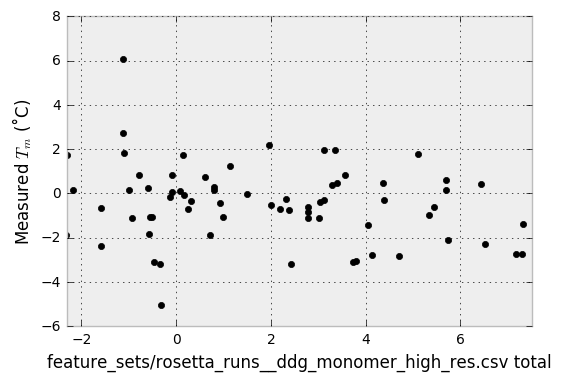


Feature set: feature_sets/rosetta_runs_ddg_monomer.csv
fa_sol          -0.292737
fa_dun          -0.134925
yhh_planarity   -0.056853
pro_close       -0.051345
fa_rep          -0.027667
fa_intra_rep    -0.026757
total            0.017224
fa_elec          0.068927
hbond_sc         0.114652
rama             0.164787
p_aa_pp          0.192808
fa_atr           0.223547
hbond_bb_sc      0.286535
Name: target_tm, dtype: float64


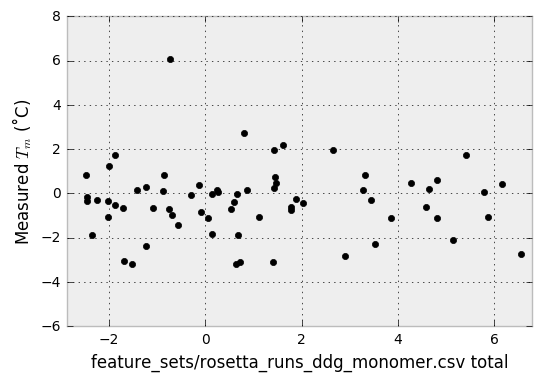


Feature set: feature_sets/bigger_constraint_exploration_run.csv
fa_sol                 -0.349138
lk_ball                -0.255897
fa_intra_sol_xover4    -0.149005
hbond_sr_bb            -0.124593
dslf_fa13              -0.075124
fa_dun_dev             -0.054400
fa_rep                 -0.025473
p_aa_pp                -0.024710
hbond_lr_bb            -0.008302
fa_dun_semi             0.021983
fa_intra_rep_xover4     0.048354
pro_close               0.049805
total_score             0.051184
fa_intra_atr_xover4     0.054909
fa_dun_rot              0.056837
fa_intra_elec           0.060184
lk_ball_bridge_uncpl    0.072218
rama_prepro             0.100606
hbond_sc                0.108834
hxl_tors                0.113241
ref                     0.117161
fa_atr                  0.166235
hbond_bb_sc             0.170850
fa_elec                 0.184603
lk_ball_bridge          0.198519
omega                   0.254099
lk_ball_iso             0.314298
Name: target_tm, dtype: float64


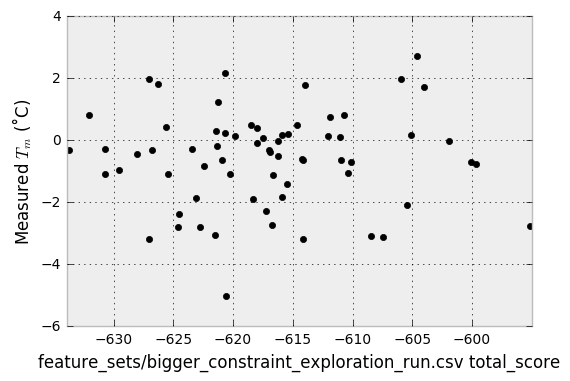

In [35]:
for i, f_set in enumerate( feature_sets ):
    X, y, J = features[ ( 'tm', f_set ) ]
    print( 'Feature set:', f_set )  
    corr = J.corr(method='pearson')['target_tm'].drop('target_tm').dropna().sort_values()
    print( corr )
    
    for feat in J.columns:
        if feat in make_plots:
            plt.scatter( J[ feat ], J[ 'target_tm' ], color='k' )
            plt.xlim( J[feat].quantile(0.05), J[feat].quantile(0.95), )
            plt.xlabel( '{} {}'.format( f_set, feat ) ) 
            plt.ylabel( 'Measured $T_m$ (˚C)' ) 
            plt.show()
    
    print()

                       target_tm  abs_corr
disulfide               0.026874  0.026874
entropy sidechain       0.045208  0.045208
Solvation Hydrophobic  -0.048905  0.048905
backbone clash          0.075336  0.075336
Van der Waals           0.076851  0.076851
Sidechain Hbond         0.091553  0.091553
helix dipole            0.113391  0.113391
Van der Waals clashes  -0.121095  0.121095
torsional clash        -0.133841  0.133841
energy Ionisation      -0.143117  0.143117
total energy           -0.179179  0.179179
entropy mainchain       0.191402  0.191402
Solvation Polar        -0.218667  0.218667
Electrostatics         -0.248610  0.248610
Backbone Hbond          0.295736  0.295736


/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


                       target_tm  abs_corr
SR_5_total_score       -0.002951  0.002951
SR_5_interf_E_1_2      -0.003184  0.003184
SR_4_hbond_sc           0.013907  0.013907
total_score             0.022516  0.022516
tot_nlpstat_pm          0.022517  0.022517
fa_rep                  0.027460  0.027460
SR_5_hbond_sc          -0.036701  0.036701
tot_NLconts_pm         -0.039178  0.039178
SR_4_nlpstat_pm         0.040103  0.040103
tot_total_pos_charges  -0.043036  0.043036
SR_5_hbond_pm           0.046160  0.046160
SR_4_fa_rep            -0.048775  0.048775
tot_nlsurfaceE_pm       0.049049  0.049049
SR_1_pstat_pm           0.055836  0.055836
SR_3_pstat_pm           0.055836  0.055836
SR_3_burunsat_pm        0.056448  0.056448
SR_1_burunsat_pm        0.056448  0.056448
SR_5_burunsat_pm        0.056598  0.056598
SR_1_hbond_sc           0.060275  0.060275
SR_3_hbond_sc           0.060275  0.060275
SR_5_fa_rep            -0.079353  0.079353
tot_pstat_pm           -0.081656  0.081656
SR_4_hbond_

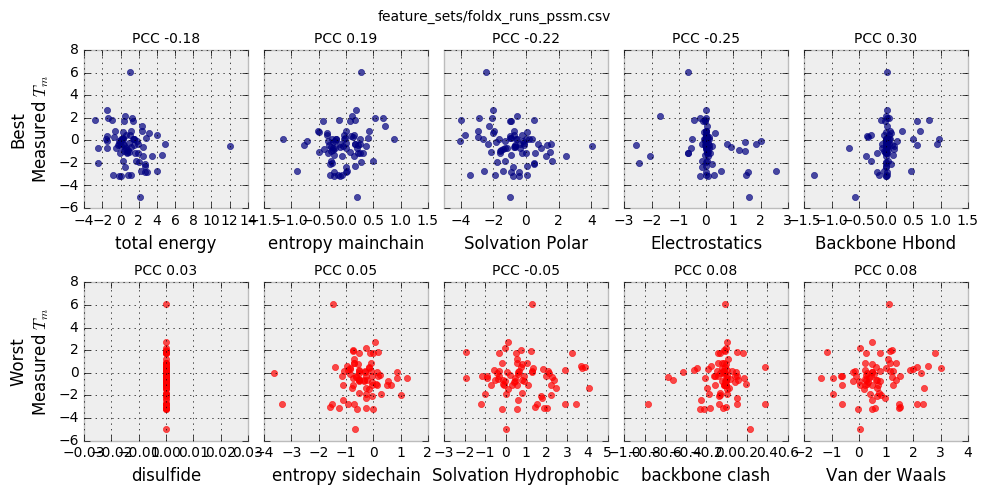

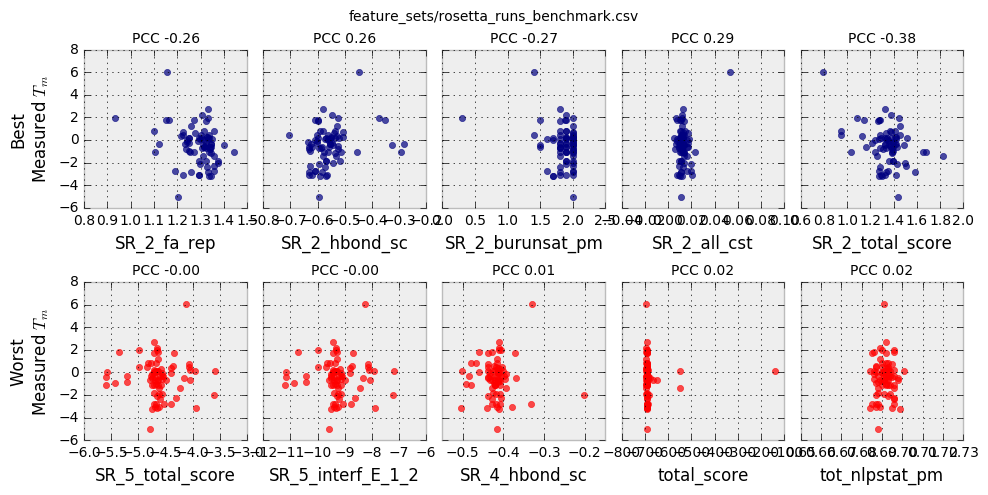

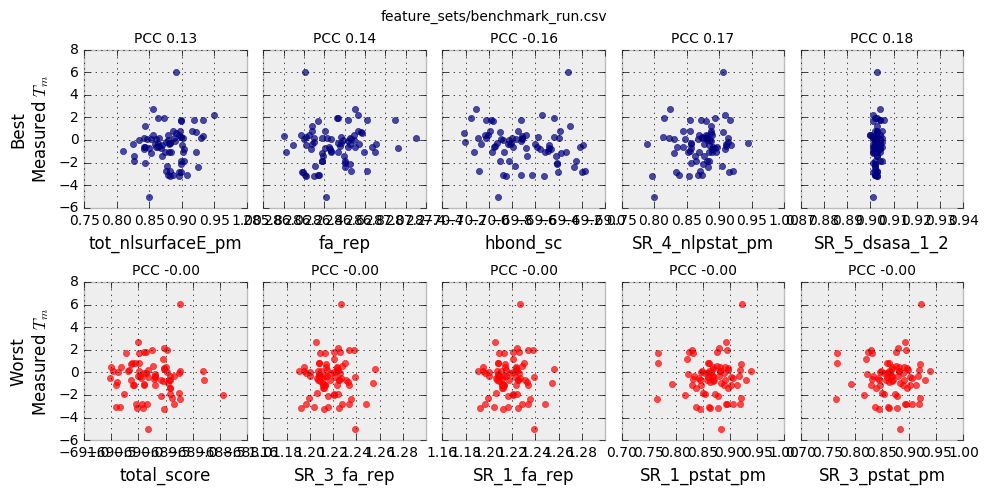

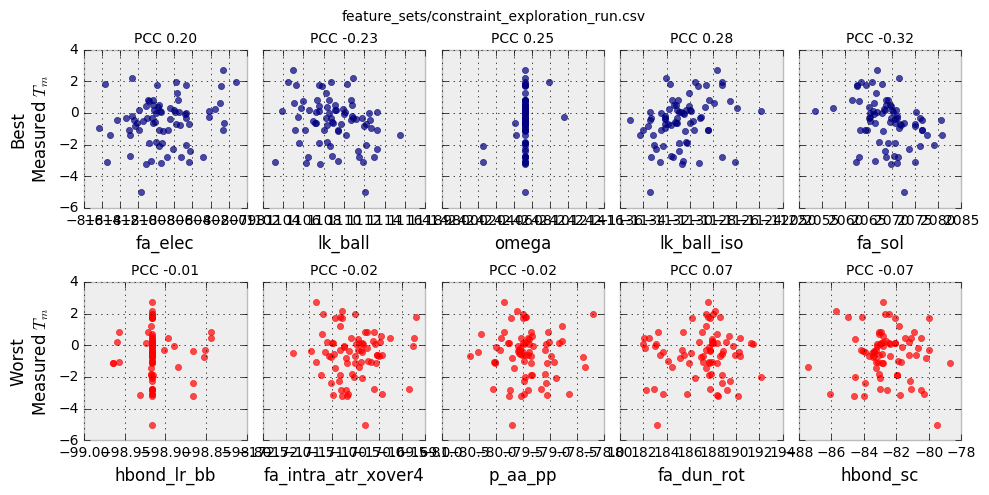

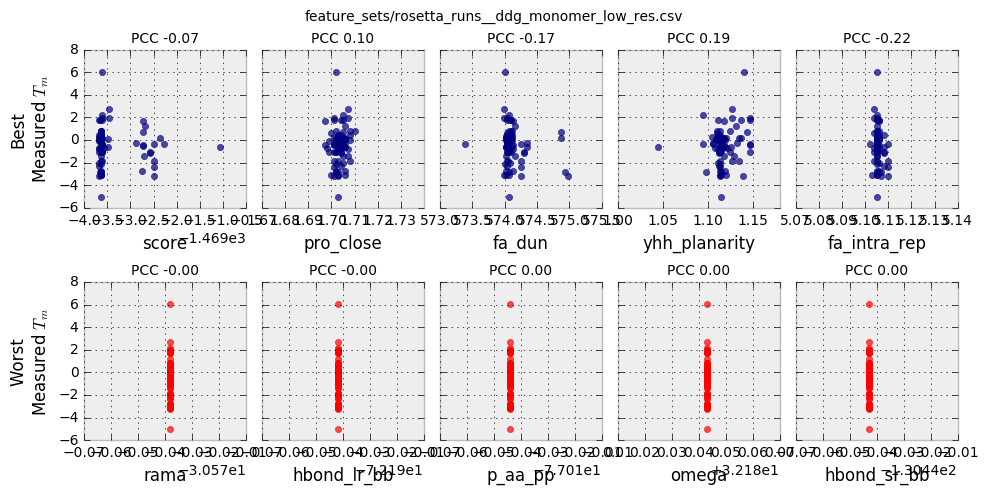

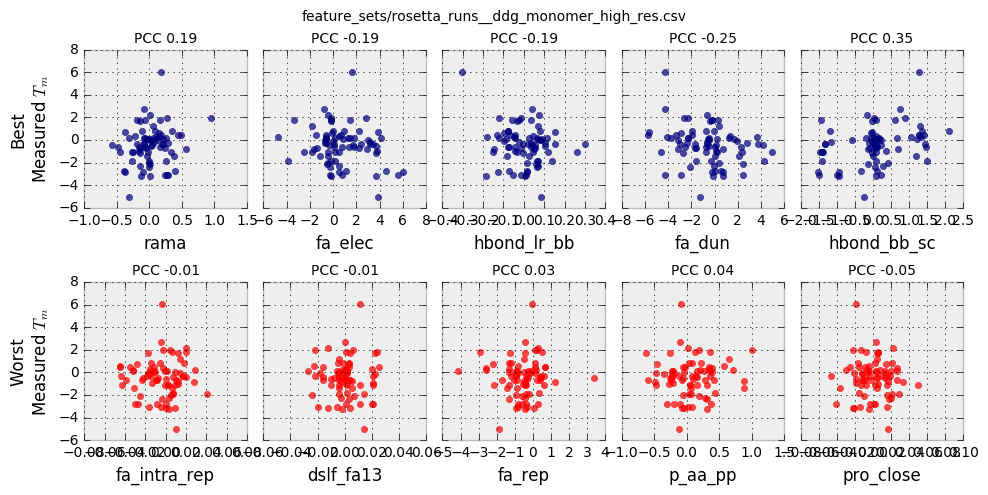

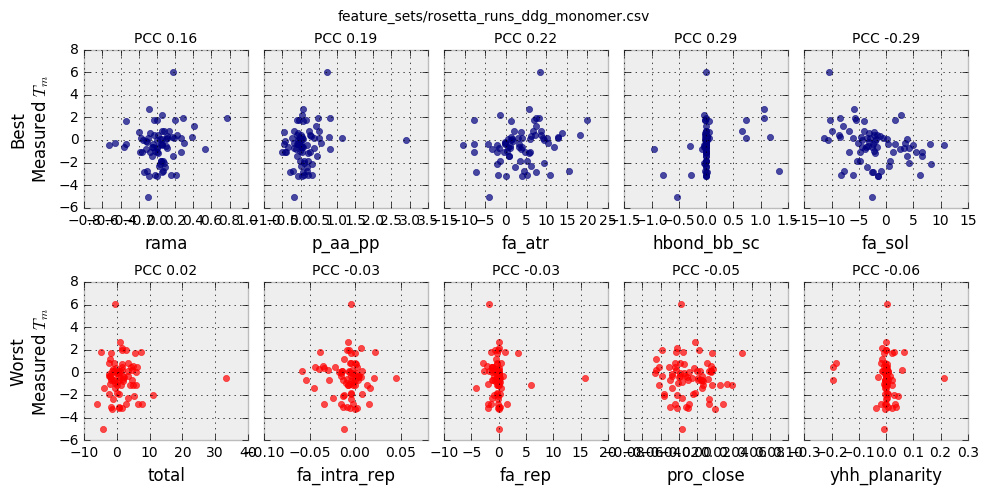

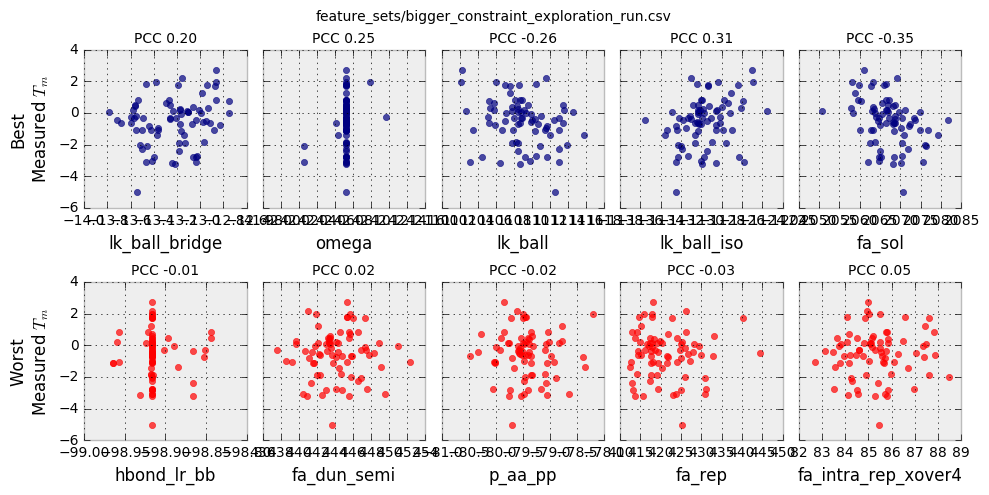

In [36]:
# plots of 5 best nd 5 worst feature for Tm paper 

# generate tables of feature correlations for Tm paper 

for i, f_set in enumerate( feature_sets ):

    # get data 
    X, y, J = features[ ( 'tm', f_set ) ] 

    # assess correlation 
    corr = J.corr()[['target_tm']].drop( 'target_tm' ).dropna()
    corr[ 'abs_corr' ] = corr.target_tm.map( abs )
    corr = corr.sort_values( 'abs_corr' ) 
    print( corr )  
    
    fig, ax = plt.subplots( nrows=2, ncols=5, sharey=True, figsize=(10,5) ) 
    fig.suptitle( f_set )
    
    for i, (idx, feature) in enumerate( corr.tail(5).iterrows() ):        
        ax[ 0, i ].set_title( 'PCC {0:2.2f}'.format( feature.target_tm ), fontsize='medium' )
        ax[ 0, i ].scatter( J[idx], y, color='navy', alpha=0.7 )  
        ax[ 0, i ].set_xlabel( idx ) 
        ax[ 0, 0 ].set_ylabel( 'Best\nMeasured $T_m$' )

    for i, (idx, feature) in enumerate( corr.head(5).iterrows() ):
        ax[ 1, i ].set_title( 'PCC {0:2.2f}'.format( feature.target_tm ), fontsize='medium' )
        ax[ 1, i ].scatter( J[idx], y, color='red', alpha=0.7 )  
        ax[ 1, i ].set_xlabel( idx ) 
        ax[ 1, 0 ].set_ylabel( 'Worst\nMeasured $T_m$' )
        
    fig.tight_layout()
    fig.subplots_adjust( wspace=0.1, top=0.9 )
    
    fig.show()

Feature set: feature_sets/foldx_runs_pssm.csv
Electrostatics          -0.248610
Solvation Polar         -0.218667
total energy            -0.179179
energy Ionisation       -0.143117
torsional clash         -0.133841
Van der Waals clashes   -0.121095
Solvation Hydrophobic   -0.048905
disulfide                0.026874
entropy sidechain        0.045208
backbone clash           0.075336
Van der Waals            0.076851
Sidechain Hbond          0.091553
helix dipole             0.113391
entropy mainchain        0.191402
Backbone Hbond           0.295736
Name: target_tm, dtype: float64
Feature set: feature_sets/rosetta_runs_benchmark.csv
SR_2_total_score        -0.382355
SR_2_burunsat_pm        -0.268314
SR_2_fa_rep             -0.261130
tot_burunsat_pm         -0.230710
hbond_sc                -0.207570
SR_3_hbond_pm           -0.181342
SR_1_hbond_pm           -0.181342
SR_4_burunsat_pm        -0.140314
SR_2_hbond_pm           -0.131520
SR_3_all_cst            -0.125746
SR_1_all_cst       

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


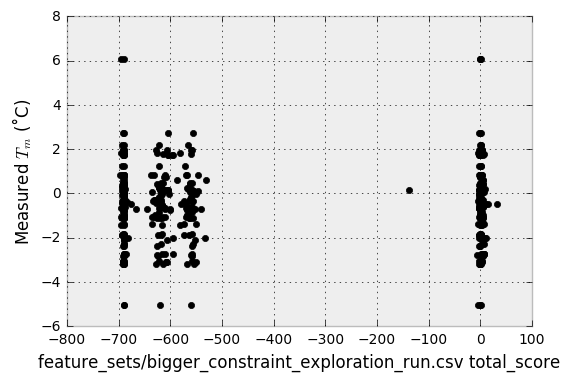

In [37]:
# combined plot of total score predictions for Tm paper 

fig, ax = plt.subplots() 
make_plots = [ 'total', 'total_score', 'total energy' ] 
for i, f_set in enumerate( feature_sets ):
    print( 'Feature set:', f_set )
    X, y, J = features[ ( 'tm', f_set ) ]
    corr = J.corr(method='pearson')['target_tm'].drop('target_tm').dropna().sort_values()
    print( corr )
    for feat in J.columns:
        if feat in make_plots:
            ax.scatter( J[ feat ], J[ 'target_tm' ], color='k' )
            ax.set_xlabel( '{} {}'.format( f_set, feat ) ) 
            ax.set_ylabel( 'Measured $T_m$ (˚C)' ) 
            fig.show()